In [1]:
import matplotlib.pyplot as plt

from scipy import stats
import scipy as sp

import numpy as np
import pandas as pd
import os
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

%matplotlib inline

## - Project started from 2019-10-08

## - Goal
- 1) Get familiar with "Logistic Regression Model"
- 2) Try to build a model that can perform better than one of my original features.

## - Data Split
- 1) 20150831 ~ 20180331 (train)
- 2) 20180401 ~ 20190331 (test)
- 3) 20190401 ~ 20191008 (out of sample)

## - Model
- Discriminative Model
    - Logistic Regression Analysis

## - Basic concept of the "Logistic Regression"
- Linear and Logistic Regression are the most basic form of regression.
- The Logistic Regression can be used when the dependent variable (target value) is **binary value**. 
- The Linear Regression can be used when the dependent variable (target values) is **continuous value**.
$$ p(y \mid x) = \text{Bin} (y; \mu(x), N) $$
$$ p(y \mid x) = \text{Bern} (y; \mu(x) )$$
- A problem that we want to solve has a 0 or 1 dependent variable (y value), we predict the $\mu(x)$ based on the $x$ values, and predict dependent variable (y value).
$$ \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} $$
- Then, What is the $\mu(x)$ ?
    - In a Logistic Regression, it assumes that the Bernoulli function's parameter($\mu$) is the function of $x$.
    - a sigmoid function that converts $x$ values to 0 ~ 1 values is used for the $\mu(x)$.
$$
\mu = f(w^Tx + b)
$$
    - For the $\mu$ function, below functions are commonly used.
        - 1) Logistic Function
        $$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
        - 2) Hyperbolic Tangent Function
        $$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$
        - 3) Error Function
        $$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
    - From my experience, the Logistic function is mostly used for the sigmoid function.

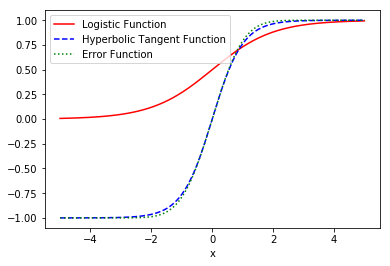

In [2]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic Function")
plt.plot(xx, np.tanh(xx), 'b--', label="Hyperbolic Tangent Function")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="Error Function")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

- **Let's look on the Logistic Function.**
    - the logistic function is a function that converts a list of values (between -infinite, +infinite) to a list of values (between 0, 1).
    - From the Bernoulli trial, a probability of $\mu$ that having a 1, and a probability of 1 - $\mu$ that having a 0 can be used for the "odds ratio" as below
 $$ \text{odds ratio} = \dfrac{\mu}{1-\mu} $$
    - By converting $\mu$ values (values between 0 to 1) to "odds ratio", the values will be converted 0 to $+\infty$.
    - Adding "Log Function" on the "odds ratio" is called **"Logit Function**".
    - **Logit Function**
         $$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right) $$ 
        - the Logit Function's value will have a range as -$\infty$ to +$\infty$.
        - the Logist"ic" function is an inverse function of logit function.
    - **Logistic Function**
        - Since it is an inverse function of Logit function, the values will be converted from (-$\infty$, +$\infty$) to [0,1].
         $$ \text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}} $$  
        
- **Decision Function**
    - If we use Logistic Function $\sigma(z)$, the relationship between $z$ and $\mu$ will be explained as below,
        - if $z = 0$, the $\mu = 0.5\; \rightarrow$ can not be classified, 50% vs 50%
        - if $z > 0$, the $\mu > 0.5\; \rightarrow \hat{y} = 1$
        - if $z < 0$, the $\mu < 0.5\; \rightarrow \hat{y} = 0$
    - $z$ take a role as a "decision function".
     $$ z = w^Tx  $$
    - As we could see, the decision boundary function is linear in logistic regression model.
- **Parameter Estimation (Logistic Regression)**
    - We are able to estimate the parameters of Logistic Regression Model by using "Maximum Likelihood Estimation(MLE)".
    - Since the Logistic Regression assumes that the target value follows Binomial Distribution (If trial is N = 1, it follows Bernoulli DIstribution), we can express as below,
     $$ p(y \mid x) = \text{Bern} (y;\mu(x;w) ) = \mu(x;w)^y ( 1 - \mu(x;w) )^{1-y} $$
    - we are going to replace the $\mu$ with logistic function as previously mentioned.
     $$
\mu(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$
     $$ 
    \begin{eqnarray}
    p(y \mid x) 
    &=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left(  1 - \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
    &=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left( \dfrac{\exp{(-w^Tx)}}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
    \end{eqnarray}
    $$

    - Let's find the Log Likelihood (LL)
     $$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \mu(x_i;w)^{y_i} (1-\mu(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\mu(x_i;w) +  (1-y_i)\log(1-\mu(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$
    - To find the w that maximizes LL, we need to differentiate the equation as below, 
         
    $$ \dfrac{\partial\text{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial\text{LL}}{\partial \mu(x_i;w)} \dfrac{\partial\mu(x_i;w)}{\partial w} $$

        - First of all, let's differentiate the $\mu$ with $w$.
            
    $$ 
    \dfrac{\partial \mu(x_i;w)}{\partial w} 
    = \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
    = \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
    = \mu(x_i;w)(1-\mu(x_i;w)) x_i 
    $$
        - Secondly, let's differentiate the LL with $u$
             
    $$
    \dfrac{\partial\text{LL}}{\partial \mu(x_i;w)} =  \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) 
    $$
        - Now, let's multiply them all.
            
    $$ 
    \begin{eqnarray}
    \dfrac{\partial \text{LL}}{\partial w} 
    &=& \sum_{i=1}^N \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) \mu(x_i;w)(1-\mu(x_i;w)) x_i   \\
    &=& \sum_{i=1}^N \big( y_i (1-\mu(x_i;w)) - (1-y_i)\mu(x_i;w)  \big)  x_i \\
    &=& \sum_{i=1}^N \big( y_i  - \mu(x_i;w) \big) x_i \\
    \end{eqnarray}
    $$
    - Since this is non-linear function, we are unable to find an optimal $w$ by finding a $w$ that becomes a gradient is equal to zero. 
    - Therefore, we need to find an optimal $w$ by using **numerical optimization**.
- **Numerical Optimization**
    - Maximizing the Loglikelihood(LL) is minimizing the below objective function.
         $$ J = -LL $$
    - Let's use "Steepest Gradient Descent".
        - gradient vector is
             $$
              g_k = \dfrac{d}{dw}(-LL)
              $$
        - And, it moves step size of $\eta_k$.
        - Therefore,
         $$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \mu(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$
- **Regularization**
    - To prevent the over-fitting, we could add penalty like Lidge, Lasso, ElasticNet.
    - For example, if we use Lidge Regularization, it will be as below,
         $$ J = -\text{LL} + \lambda \| w \|^2 $$

### - Read Data
- original data has 3 features (independent varaibles), and the price_diff is a target value (dependent variable).
- I have divided the original data set into three data sets as 1) train_data 2) test_data 3) oos_data
    - train data: 617 samples (62.65%)
    - test data: 238 samples (24.15%)
    - oos data: 130 samples (13.20%)

In [3]:
data = pd.read_excel('C:/Users/win/Desktop/DAT_SAMPLE.xlsx')
data = data[data['price_diff'] != 0].reset_index(drop=True)

train_data = data[data['date'] <= 20180331].reset_index(drop=True)
test_data = data[(data['date'] >= 20180401) & (data['date'] <= 20190331)].reset_index(drop=True)
oos_data = data[data['date'] >= 20190401].reset_index(drop=True)

print('# number of training samples: ', len(train_data))
print('# number of test samples: ', len(test_data))
print('# number of oos samples: ', len(oos_data))

# number of training samples:  617
# number of test samples:  238
# number of oos samples:  130


In [4]:
data.head()

,date,feature_0,feature_s,feature_j,price_diff
0,20150831,-1,-1,1,55
1,20150901,-1,-1,1,-150
2,20150902,-1,-1,1,345
3,20150903,1,1,1,-70
4,20150904,-1,-1,1,-235


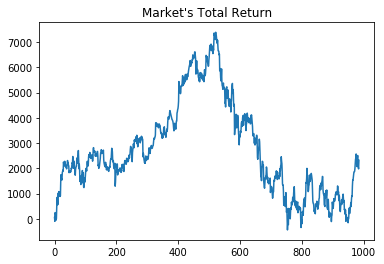

In [5]:
plt.plot(data['price_diff'].cumsum())
plt.title("Market's Total Return")
plt.show()

## - Original Feature (feature_0) Result
- 1) train
- 2) test
- 3) oos

########################### train Summary ###########################
1. Total Profit:  11290
2. Happy Rate:  54.1667 %
3. Sharpe Ratio:  1.599
4. MDD Amount : -1710
5. MDD Length : 15
###########################
33
23
###########################
38
17
###########################
94
88
###########################
160
147


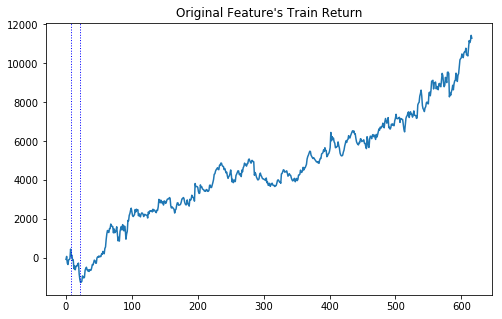

In [6]:
train_origin_feature_profits = []

for i in range(len(train_data)):

    origin_feature = train_data.iat[i, 1]
    price_diff = train_data.iat[i,4]
               
    if origin_feature > 0:
        train_origin_feature_profits.append(price_diff)
    
    elif origin_feature < 0:
        train_origin_feature_profits.append(-price_diff)
    
    elif origin_feature == 0:
        train_origin_feature_profits.append(0)
    
    else:
        print('some thing wrong')
        
train_data['origin_feature_profits'] = train_origin_feature_profits

win = len(train_data[train_data['origin_feature_profits'] > 0])
lose = len(train_data[train_data['origin_feature_profits'] < 0])

MDD_end_idx = (np.maximum.accumulate(train_data['origin_feature_profits'].cumsum()) - train_data['origin_feature_profits'].cumsum()).idxmax()
MDD_start_idx = train_data['origin_feature_profits'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = train_data['origin_feature_profits'].cumsum()[:MDD_start_idx + 1].iloc[-1] - train_data['origin_feature_profits'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### train Summary ###########################')
print('1. Total Profit: ', np.sum(train_data['origin_feature_profits']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (train_data['origin_feature_profits'].mean() / train_data['origin_feature_profits'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)

train_origin_feature_profit = pd.DataFrame(train_origin_feature_profits, columns=['profit'])
print('###########################')
print(len(train_origin_feature_profit[train_origin_feature_profit['profit'] > 300]))
print(len(train_origin_feature_profit[train_origin_feature_profit['profit'] < -300]))
print('###########################')
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] > 200) & (train_origin_feature_profit['profit'] <= 300)]))
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] >= -300) & (train_origin_feature_profit['profit'] < -200)]))
print('###########################')
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] > 100) & (train_origin_feature_profit['profit'] <= 200)]))
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] >= -200) & (train_origin_feature_profit['profit'] < -100)]))
print('###########################')
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] > 0) & (train_origin_feature_profit['profit'] <= 100)]))
print(len(train_origin_feature_profit[(train_origin_feature_profit['profit'] >= -100) & (train_origin_feature_profit['profit'] < -0)]))

plt.figure(figsize=(8, 5))
plt.title("Original Feature's Train Return")
plt.plot(train_data['origin_feature_profits'].cumsum())
plt.axvline(train_data.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(train_data.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

########################### test Summary ###########################
1. Total Profit:  3215
2. Happy Rate:  52.9915 %
3. Sharpe Ratio:  1.0069
4. MDD Amount : -1850
5. MDD Length : 17
###########################
22
15
###########################
19
20
###########################
30
33
###########################
53
42


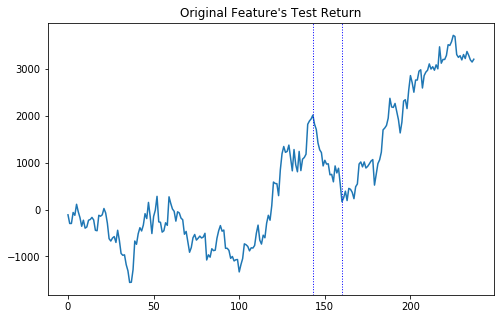

In [7]:
test_origin_feature_profits = []

for i in range(len(test_data)):

    origin_feature = test_data.iat[i, 1]
    price_diff = test_data.iat[i,4]
               
    if origin_feature > 0:
        test_origin_feature_profits.append(price_diff)
    
    elif origin_feature < 0:
        test_origin_feature_profits.append(-price_diff)
    
    elif origin_feature == 0:
        test_origin_feature_profits.append(0)
    
    else:
        print('some thing wrong')
        
test_data['origin_feature_profits'] = test_origin_feature_profits

win = len(test_data[test_data['origin_feature_profits'] > 0])
lose = len(test_data[test_data['origin_feature_profits'] < 0])

MDD_end_idx = (np.maximum.accumulate(test_data['origin_feature_profits'].cumsum()) - test_data['origin_feature_profits'].cumsum()).idxmax()
MDD_start_idx = test_data['origin_feature_profits'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = test_data['origin_feature_profits'].cumsum()[:MDD_start_idx + 1].iloc[-1] - test_data['origin_feature_profits'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### test Summary ###########################')
print('1. Total Profit: ', np.sum(test_data['origin_feature_profits']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (test_data['origin_feature_profits'].mean() / test_data['origin_feature_profits'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)


test_origin_feature_profit = pd.DataFrame(test_origin_feature_profits, columns=['profit'])
print('###########################')
print(len(test_origin_feature_profit[test_origin_feature_profit['profit'] > 300]))
print(len(test_origin_feature_profit[test_origin_feature_profit['profit'] < -300]))
print('###########################')
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] > 200) & (test_origin_feature_profit['profit'] <= 300)]))
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] >= -300) & (test_origin_feature_profit['profit'] < -200)]))
print('###########################')
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] > 100) & (test_origin_feature_profit['profit'] <= 200)]))
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] >= -200) & (test_origin_feature_profit['profit'] < -100)]))
print('###########################')
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] > 0) & (test_origin_feature_profit['profit'] <= 100)]))
print(len(test_origin_feature_profit[(test_origin_feature_profit['profit'] >= -100) & (test_origin_feature_profit['profit'] < -0)]))

plt.figure(figsize=(8, 5))
plt.title("Original Feature's Test Return")
plt.plot(test_data['origin_feature_profits'].cumsum())
plt.axvline(test_data.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(test_data.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

########################### oos Summary ###########################
1. Total Profit:  2150
2. Happy Rate:  51.6129 %
3. Sharpe Ratio:  1.3783
4. MDD Amount : -1750
5. MDD Length : 23
###########################
10
4
###########################
13
8
###########################
10
19
###########################
31
29


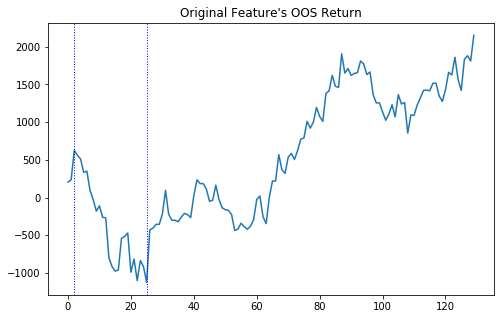

In [8]:
oos_origin_feature_profits = []

for i in range(len(oos_data)):

    origin_feature = oos_data.iat[i, 1]
    price_diff = oos_data.iat[i,4]
               
    if origin_feature > 0:
        oos_origin_feature_profits.append(price_diff)
    
    elif origin_feature < 0:
        oos_origin_feature_profits.append(-price_diff)
    
    elif origin_feature == 0:
        oos_origin_feature_profits.append(0)
    
    else:
        print('some thing wrong')
        
oos_data['origin_feature_profits'] = oos_origin_feature_profits

win = len(oos_data[oos_data['origin_feature_profits'] > 0])
lose = len(oos_data[oos_data['origin_feature_profits'] < 0])

MDD_end_idx = (np.maximum.accumulate(oos_data['origin_feature_profits'].cumsum()) - oos_data['origin_feature_profits'].cumsum()).idxmax()
MDD_start_idx = oos_data['origin_feature_profits'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = oos_data['origin_feature_profits'].cumsum()[:MDD_start_idx + 1].iloc[-1] - oos_data['origin_feature_profits'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### oos Summary ###########################')
print('1. Total Profit: ', np.sum(oos_data['origin_feature_profits']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (oos_data['origin_feature_profits'].mean() / oos_data['origin_feature_profits'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)

oos_origin_feature_profit = pd.DataFrame(oos_origin_feature_profits, columns=['profit'])
print('###########################')
print(len(oos_origin_feature_profit[oos_origin_feature_profit['profit'] > 300]))
print(len(oos_origin_feature_profit[oos_origin_feature_profit['profit'] < -300]))
print('###########################')
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] > 200) & (oos_origin_feature_profit['profit'] <= 300)]))
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] >= -300) & (oos_origin_feature_profit['profit'] < -200)]))
print('###########################')
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] > 100) & (oos_origin_feature_profit['profit'] <= 200)]))
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] >= -200) & (oos_origin_feature_profit['profit'] < -100)]))
print('###########################')
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] > 0) & (oos_origin_feature_profit['profit'] <= 100)]))
print(len(oos_origin_feature_profit[(oos_origin_feature_profit['profit'] >= -100) & (oos_origin_feature_profit['profit'] < -0)]))

plt.figure(figsize=(8, 5))
plt.title("Original Feature's OOS Return")
plt.plot(oos_data['origin_feature_profits'].cumsum())
plt.axvline(oos_data.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(oos_data.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

## - ML Model Build-up Stage (Logistic Regression)
- 0) **Data Exploration**
- 1) **Label Tunning**
    - a) Numeric labels -> categorical labels (since I have assumed that I have categorical labels, I have converted it from numerical to categorical)
        - origin label: price_diff (numeric values)
            - example: data['price_diff'] = [55, -150, 345, -70, ..., -50, -70, 340]
            - Since my goal is to predict a big movement of price_diff, I would like to convert labels as below,
                - 1 (category): 0 < target <= 100  
                - 2 (category): 100 < target <= 200
                - 3 (category): 200 < target
                - -1 (category): -100 <= target < 0
                - -2 (category): -200 <= target < -100
                - -3 (category): target < -200
    - b) OvR (One-vs-Rest) for the multi-class labels.
        - Since the labels have 6 classes, the OvR will be needed.
- 2) **Sample Weight Balancing**
    - The classes are imbalanced. (it is a nature of market)
    - Therefore, I would like to use "over-sampling method" for the balancing purpose.
        - Since the features are categorical variables, the SMOTENC will be applied for the over-sampling.

### - Label Converting (Numerical to Categorical)

In [9]:
new_label = []

for i in range(len(data['price_diff'])):
    
    price_diff = data.iat[i, 4]
    
    if (price_diff > 0) and (price_diff <= 100):
        new_label.append('1')
    elif (price_diff > 100) and (price_diff <= 200):
        new_label.append('2')
    elif (price_diff > 200):
        new_label.append('3')
        
    elif (price_diff < 0) and (price_diff >= -100):
        new_label.append('-1')
    elif (price_diff < -100) and (price_diff >= -200):
        new_label.append('-2')
    elif (price_diff < -200):
        new_label.append('-3')
        
data['new_label'] = new_label

train_data = data[data['date'] <= 20180331].reset_index(drop=True)
test_data = data[(data['date'] >= 20180401) & (data['date'] <= 20190331)].reset_index(drop=True)
oos_data = data[data['date'] >= 20190401].reset_index(drop=True)

X_train = train_data.iloc[:, [1,2,3]].astype('category')
y_train = train_data.iloc[:, 5].astype('category')

X_test = test_data.iloc[:, [1,2,3]].astype('category')
y_test = test_data.iloc[:, 5].astype('category')

X_oos = oos_data.iloc[:, [1,2,3]].astype('category')
y_oos = oos_data.iloc[:, 5].astype('category')

print('##############################')
print(X_train.dtypes)
print('##############################')
print(y_train.value_counts())
print('##############################')

##############################
feature_0    category
feature_s    category
feature_j    category
dtype: object
##############################
1     166
-1    152
2      95
-2     90
3      66
-3     48
Name: new_label, dtype: int64
##############################


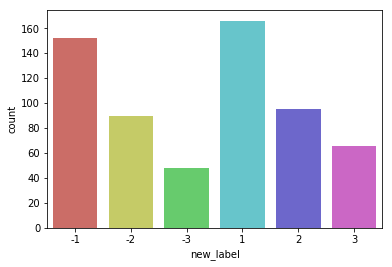

In [10]:
import seaborn as sns
sns.countplot(x=y_train, palette='hls')
plt.show()

In [11]:
print("# Bull Market's day: ", len(data[data['price_diff'] > 0]), 'days')
print("# Bear Market's day: ", len(data[data['price_diff'] < 0]), 'days')

# Bull Market's day:  519 days
# Bear Market's day:  466 days


### - Apply the SMOTENC (Over-sampling) to make it balanced.

In [12]:
from imblearn.over_sampling import SMOTENC

os_X_train, os_y_train = SMOTENC(random_state=0,
                                 categorical_features=[0,2]).fit_sample(X_train, y_train)

os_X_train = pd.DataFrame(os_X_train).astype('category')

print('##############################')
print(pd.DataFrame(os_X_train).dtypes)
print('##############################')
print(pd.Series(os_y_train).value_counts())
print('##############################')

##############################
0    category
1    category
2    category
dtype: object
##############################
1     166
-3    166
3     166
-2    166
2     166
-1    166
dtype: int64
##############################


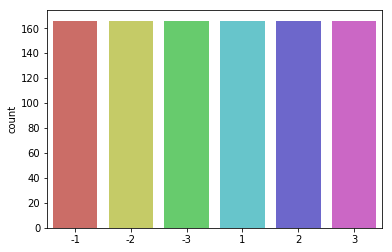

In [13]:
sns.countplot(x=os_y_train, palette='hls')
plt.show()

### - Apply the OvR (One-vs-Rest) for the multi-class labels and fit the data into the model.
- Model can be tunned by 
    - 1) changing a regularization level (method: *C*).
        - Default C == 1.0
        - Below 1.0 of C => hard on regularization (Could reduce the over-fitting, but lower your accuracy, precision, and etc from train data set)
        - Above 1.0 of C => easy on regularization (Could cause an over-fitting, but you could make accuracy, precision better in train set)
    - 2) changing class weights (method: *class_weight*)
    - 3) chaning solvers (method: *solver*)

In [14]:
Logistic_Regression_model_ovr = LogisticRegression(multi_class='ovr').fit(os_X_train, os_y_train)

C:\Users\Jay\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print('############# Classification Report #############')
print(classification_report(os_y_train, Logistic_Regression_model_ovr.predict(os_X_train)))
print('############# Below is the predicted values #############')
print(pd.Series(Logistic_Regression_model_ovr.predict(os_X_train)).value_counts())

############# Classification Report #############
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       166
          -2       0.00      0.00      0.00       166
          -3       0.27      0.63      0.38       166
           1       0.50      0.03      0.06       166
           2       0.22      0.36      0.27       166
           3       0.25      0.51      0.33       166

    accuracy                           0.25       996
   macro avg       0.21      0.25      0.17       996
weighted avg       0.21      0.25      0.17       996

############# Below is the predicted values #############
-3    379
3     337
2     270
1      10
dtype: int64


C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### - Quick Thoughts
- According to the above result,should I interpret that the model can classify well on the '-3' category and '+3' category?
    - If it reall does, then I could try to use it on the option products.
    - Need to analyze more in depth.
- This model didn't predict '-2', '-1' class at all, and only 10 target values were predicted on '+1' class.
- How should I interpret that?
    - Let's take a look at the Logistic Regression's Summary by using **"StatsModels"**.
        - As we know, there are two major packages on the ML subjects.
            - 1) Scikit Learn
                - Mostly, we use Scikit Learn's Logistic Regression due to easiness.
            - 2) StatsModels
                 - StatsModels provide Summary Report, but a little bit more complex than scikit learn.
                 - Since it supports the Summary Report, we can have a better understanding of the model.
                 - Need to add constant vector.

### - StatsModel used
- Since it is a multi-label classification problem, i have to print summary 6 times. 
    - '-3' Summary
    - '-2' Summary
    - '-1' Summary
    - '+1' Summary
    - '+2' Summary
    - '+3' Summary

In [16]:
stats_data = data.iloc[:, [1,2,3,5]]
stats_data.head()

,feature_0,feature_s,feature_j,new_label
0,-1,-1,1,1
1,-1,-1,1,-2
2,-1,-1,1,3
3,1,1,1,-1
4,-1,-1,1,-3


#### - '-3' Class Summary Report

In [17]:
tmp_0 = stats_data[stats_data['new_label'] == '-3']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '-3']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_minus_3_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_minus_3_class_y = tmp_2['new_label'].astype(int)

logit_mod_minus_3_class = sm.Logit(stats_data_minus_3_class_y, stats_data_minus_3_class_X)
logit_res_minus_3_class = logit_mod_minus_3_class.fit(disp=0)
print(logit_res_minus_3_class.summary())

                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                 0.03088
Time:                        09:50:16   Log-Likelihood:                -325.99
converged:                       True   LL-Null:                       -336.38
                                        LLR p-value:                 0.0001172
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1188      0.106    -19.949      0.000      -2.327      -1.911
feature_0     -0.3129      0.129     -2.427      0.015      -0.566      -0.060
feature_s      0.1525      0.137      1.117      0.2

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### - '-2' Class Summary Report

In [18]:
tmp_0 = stats_data[stats_data['new_label'] == '-2']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '-2']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_minus_2_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_minus_2_class_y = tmp_2['new_label'].astype(int)

logit_mod_minus_2_class = sm.Logit(stats_data_minus_2_class_y, stats_data_minus_2_class_X)
logit_res_minus_2_class = logit_mod_minus_2_class.fit(disp=0)
print(logit_res_minus_2_class.summary())

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:               0.0002597
Time:                        09:50:16   Log-Likelihood:                -397.15
converged:                       True   LL-Null:                       -397.25
                                        LLR p-value:                    0.9766
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8166      0.093    -19.444      0.000      -2.000      -1.634
feature_0     -0.0222      0.113     -0.197      0.844      -0.243       0.199
feature_s      0.0496      0.118      0.419      0.6

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### - '-1' Class Summary Report

In [19]:
tmp_0 = stats_data[stats_data['new_label'] == '-1']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '-1']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_minus_1_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_minus_1_class_y = tmp_2['new_label'].astype(int)

logit_mod_minus_1_class = sm.Logit(stats_data_minus_1_class_y, stats_data_minus_1_class_X)
logit_res_minus_1_class = logit_mod_minus_1_class.fit(disp=0)
print(logit_res_minus_1_class.summary())

                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                0.004826
Time:                        09:50:16   Log-Likelihood:                -524.32
converged:                       True   LL-Null:                       -526.86
                                        LLR p-value:                    0.1656
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2672      0.079    -15.972      0.000      -1.423      -1.112
feature_0      0.0346      0.093      0.371      0.711      -0.148       0.217
feature_s     -0.1610      0.097     -1.658      0.0

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### - '+1' Class Summary Report

In [20]:
tmp_0 = stats_data[stats_data['new_label'] == '1']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '1']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_plus_1_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_plus_1_class_y = tmp_2['new_label'].astype(int)

logit_mod_plus_1_class = sm.Logit(stats_data_plus_1_class_y, stats_data_plus_1_class_X)
logit_res_plus_1_class = logit_mod_plus_1_class.fit(disp=0)
print(logit_res_plus_1_class.summary())

                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                0.004823
Time:                        09:50:16   Log-Likelihood:                -559.54
converged:                       True   LL-Null:                       -562.25
                                        LLR p-value:                    0.1433
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0920      0.076    -14.429      0.000      -1.240      -0.944
feature_0      0.1096      0.090      1.221      0.222      -0.066       0.286
feature_s     -0.0214      0.093     -0.230      0.8

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### - '+2' Class Summary Report

In [21]:
tmp_0 = stats_data[stats_data['new_label'] == '2']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '2']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_plus_2_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_plus_2_class_y = tmp_2['new_label'].astype(int)

logit_mod_plus_2_class = sm.Logit(stats_data_plus_2_class_y, stats_data_plus_2_class_X)
logit_res_plus_2_class = logit_mod_plus_2_class.fit(disp=0)
print(logit_res_plus_2_class.summary())

                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                0.001988
Time:                        09:50:16   Log-Likelihood:                -405.45
converged:                       True   LL-Null:                       -406.26
                                        LLR p-value:                    0.6560
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7933      0.093    -19.233      0.000      -1.976      -1.611
feature_0     -0.0172      0.111     -0.156      0.876      -0.234       0.199
feature_s     -0.1229      0.116     -1.061      0.2

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### - '+3' Class Summary Report

In [22]:
tmp_0 = stats_data[stats_data['new_label'] == '3']; tmp_0['new_label'] = '1'
tmp_1 = stats_data[stats_data['new_label'] != '3']; tmp_1['new_label'] = '0'
tmp_2 = pd.concat([tmp_0, tmp_1], axis=0).sort_index()

stats_data_plus_3_class_X = sm.add_constant(tmp_2.iloc[:, [0,1,2]]).astype(int)
stats_data_plus_3_class_y = tmp_2['new_label'].astype(int)

logit_mod_plus_3_class = sm.Logit(stats_data_plus_3_class_y, stats_data_plus_3_class_X)
logit_res_plus_3_class = logit_mod_plus_3_class.fit(disp=0)
print(logit_res_plus_3_class.summary())

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                           Logit Regression Results                           
Dep. Variable:              new_label   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                 0.01002
Time:                        09:50:16   Log-Likelihood:                -367.16
converged:                       True   LL-Null:                       -370.88
                                        LLR p-value:                   0.05930
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9483      0.099    -19.737      0.000      -2.142      -1.755
feature_0      0.0655      0.120      0.545      0.585      -0.170       0.301
feature_s      0.2620      0.126      2.072      0.0

### - i) Train Summary

In [23]:
print(classification_report(y_train, Logistic_Regression_model_ovr.predict(X_train)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       152
          -2       0.00      0.00      0.00        90
          -3       0.11      0.52      0.19        48
           1       0.50      0.03      0.06       166
           2       0.16      0.28      0.21        95
           3       0.14      0.47      0.22        66

    accuracy                           0.14       617
   macro avg       0.15      0.22      0.11       617
weighted avg       0.18      0.14      0.08       617



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


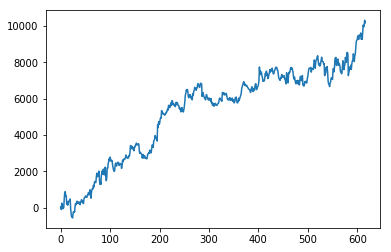

In [24]:
pred_y_train = pd.Series(Logistic_Regression_model_ovr.predict(X_train))

backtest_train_data = pd.concat([train_data['date'], 
                                train_data['price_diff'],
                                pd.Series(pred_y_train, name='pred_y_train'),
                                pd.Series(y_train, name='actual_y_train')], axis=1)

backtest_train_data_profits = []

for i in range(len(backtest_train_data)):
    
    price_diff = backtest_train_data.iat[i, 1]
    pred_y_train = backtest_train_data.iat[i, 2]
    
    if pred_y_train == '3':
        backtest_train_data_profits.append(price_diff)
    elif pred_y_train == '2':
        backtest_train_data_profits.append(price_diff)
    elif pred_y_train == '1':
        backtest_train_data_profits.append(price_diff)
    elif pred_y_train == '-1':
        backtest_train_data_profits.append(-price_diff)
    elif pred_y_train == '-2':
        backtest_train_data_profits.append(-price_diff)
    elif pred_y_train == '-3':
        backtest_train_data_profits.append(-price_diff)
    else:
        backtest_train_data_profits.append(0)
        
pd.Series(backtest_train_data_profits).cumsum().plot()

In [25]:
pd.concat([pd.Series(train_origin_feature_profits),
           pd.Series(backtest_train_data_profits)], axis=1).corr()

,0,1
0,1.000000,0.691137
1,0.691137,1.000000


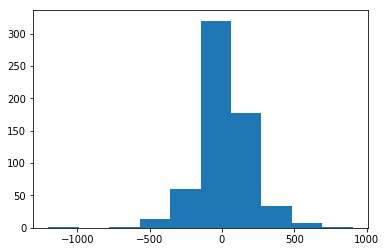

In [26]:
plt.hist(backtest_train_data_profits)
plt.show()

In [27]:
backtest_train_data_profit = pd.DataFrame(backtest_train_data_profits, columns=['profit'])
print('###########################')
print(len(backtest_train_data_profit[backtest_train_data_profit['profit'] > 300]))
print(len(backtest_train_data_profit[backtest_train_data_profit['profit'] < -300]))
print('###########################')
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] > 200) & (backtest_train_data_profit['profit'] <= 300)]))
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] >= -300) & (backtest_train_data_profit['profit'] < -200)]))
print('###########################')
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] > 100) & (backtest_train_data_profit['profit'] <= 200)]))
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] >= -200) & (backtest_train_data_profit['profit'] < -100)]))
print('###########################')
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] > 0) & (backtest_train_data_profit['profit'] <= 100)]))
print(len(backtest_train_data_profit[(backtest_train_data_profit['profit'] >= -100) & (backtest_train_data_profit['profit'] < -0)]))

###########################
35
22
###########################
36
21
###########################
95
90
###########################
160
158


### - ii) Test Summary

In [28]:
print(classification_report(y_test, Logistic_Regression_model_ovr.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        43
          -2       0.00      0.00      0.00        35
          -3       0.21      0.63      0.31        41
           1       0.00      0.00      0.00        55
           2       0.10      0.14      0.12        28
           3       0.17      0.33      0.22        36

    accuracy                           0.18       238
   macro avg       0.08      0.19      0.11       238
weighted avg       0.07      0.18      0.10       238



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


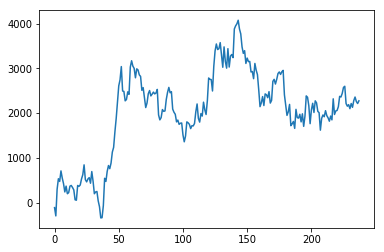

In [29]:
pred_y_test = pd.Series(Logistic_Regression_model_ovr.predict(X_test))

backtest_test_data = pd.concat([test_data['date'], 
                                test_data['price_diff'],
                                pd.Series(pred_y_test, name='pred_y_test'),
                                pd.Series(y_test, name='actual_y_test')], axis=1)

backtest_test_data_profits = []

for i in range(len(backtest_test_data)):
    price_diff = backtest_test_data.iat[i, 1]
    pred_y_test = backtest_test_data.iat[i, 2]
    
    if pred_y_test == '3':
        backtest_test_data_profits.append(price_diff)
    elif pred_y_test == '2':
        backtest_test_data_profits.append(price_diff)
    elif pred_y_test == '1':
        backtest_test_data_profits.append(price_diff)
    elif pred_y_test == '-1':
        backtest_test_data_profits.append(-price_diff)
    elif pred_y_test == '-2':
        backtest_test_data_profits.append(-price_diff)
    elif pred_y_test == '-3':
        backtest_test_data_profits.append(-price_diff)
    else:
        backtest_test_data_profits.append(0)

pd.Series(backtest_test_data_profits).cumsum().plot()

In [30]:
pd.concat([pd.Series(test_origin_feature_profits),
           pd.Series(backtest_test_data_profits)], axis=1).corr()

,0,1
0,1.000000,0.778415
1,0.778415,1.000000


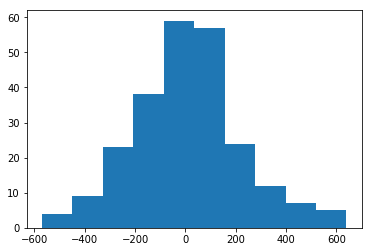

In [31]:
plt.hist(backtest_test_data_profits)
plt.show()

In [32]:
backtest_test_data_profit = pd.DataFrame(backtest_test_data_profits, columns=['profit'])
print('###########################')
print(len(backtest_test_data_profit[backtest_test_data_profit['profit'] > 300]))
print(len(backtest_test_data_profit[backtest_test_data_profit['profit'] < -300]))
print('###########################')
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] > 200) & (backtest_test_data_profit['profit'] <= 300)]))
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] >= -300) & (backtest_test_data_profit['profit'] < -200)]))
print('###########################')
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] > 100) & (backtest_test_data_profit['profit'] <= 200)]))
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] >= -200) & (backtest_test_data_profit['profit'] < -100)]))
print('###########################')
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] > 0) & (backtest_test_data_profit['profit'] <= 100)]))
print(len(backtest_test_data_profit[(backtest_test_data_profit['profit'] >= -100) & (backtest_test_data_profit['profit'] < -0)]))

###########################
22
16
###########################
18
21
###########################
31
32
###########################
52
46


### - iii) OOS Summary

In [33]:
print(classification_report(y_oos, Logistic_Regression_model_ovr.predict(X_oos)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
          -2       0.00      0.00      0.00        12
          -3       0.18      0.71      0.29        17
           1       0.00      0.00      0.00        33
           2       0.19      0.26      0.22        19
           3       0.21      0.38      0.27        21

    accuracy                           0.19       130
   macro avg       0.10      0.22      0.13       130
weighted avg       0.09      0.19      0.11       130



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


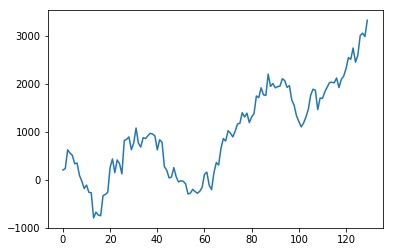

In [34]:
pred_y_oos = pd.Series(Logistic_Regression_model_ovr.predict(X_oos))
backtest_oos_data = pd.concat([oos_data['date'],
                               oos_data['price_diff'],
                               pd.Series(pred_y_oos, name='pred_y_oos'),
                               pd.Series(y_oos, name='actual_y_oos')], axis=1)
backtest_oos_data_profits = []

for i in range(len(backtest_oos_data)):
    price_diff = backtest_oos_data.iat[i, 1]
    pred_y_oos = backtest_oos_data.iat[i, 2]
        
    if pred_y_oos == '3':
        backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '2':
        backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '1':
        backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '-1':
        backtest_oos_data_profits.append(-price_diff)
    elif pred_y_oos == '-2':
        backtest_oos_data_profits.append(-price_diff)
    elif pred_y_oos == '-3':
        backtest_oos_data_profits.append(-price_diff)
    else:
        backtest_oos_data_profits.append(0)
        
pd.Series(backtest_oos_data_profits).cumsum().plot()

In [35]:
pd.concat([pd.Series(oos_origin_feature_profits),
           pd.Series(backtest_oos_data_profits)], axis=1).corr()

,0,1
0,1.000000,0.722771
1,0.722771,1.000000


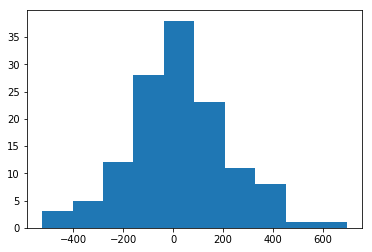

In [36]:
plt.hist(backtest_oos_data_profits)
plt.show()

In [37]:
backtest_oos_data_profit = pd.DataFrame(backtest_oos_data_profits, columns=['profit'])
print('###########################')
print(len(backtest_oos_data_profit[backtest_oos_data_profit['profit'] > 300]))
print(len(backtest_oos_data_profit[backtest_oos_data_profit['profit'] < -300]))
print('###########################')
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] > 200) & (backtest_oos_data_profit['profit'] <= 300)]))
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] >= -300) & (backtest_oos_data_profit['profit'] < -200)]))
print('###########################')
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] > 100) & (backtest_oos_data_profit['profit'] <= 200)]))
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] >= -200) & (backtest_oos_data_profit['profit'] < -100)]))
print('###########################')
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] > 0) & (backtest_oos_data_profit['profit'] <= 100)]))
print(len(backtest_oos_data_profit[(backtest_oos_data_profit['profit'] >= -100) & (backtest_oos_data_profit['profit'] < -0)]))

###########################
11
4
###########################
12
11
###########################
17
14
###########################
30
31


### - iv) (TEST + OOS)'s result
- a) original feature's result
- b) Logistic Regression's result

#### b) Original feature's result (Test + OOS)

########################### TEST + OOS Summary ###########################
1. Total Profit:  5365
2. Happy Rate:  52.514 %
3. Sharpe Ratio:  1.1286
4. MDD Amount : -1850
5. MDD Length : 17


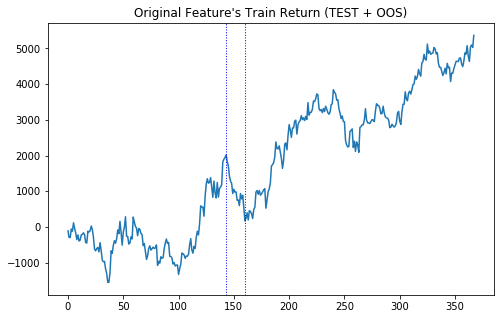

In [38]:
origin_feature_test_oos = pd.DataFrame(pd.concat([pd.Series(test_origin_feature_profits), 
                                                  pd.Series(oos_origin_feature_profits)], axis=0).reset_index(drop=True)
                                       ,columns=['origin_feature_test_oos_profit'])

win = len(origin_feature_test_oos[origin_feature_test_oos['origin_feature_test_oos_profit'] > 0])
lose = len(origin_feature_test_oos[origin_feature_test_oos['origin_feature_test_oos_profit'] < 0])

MDD_end_idx = (np.maximum.accumulate(origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum()) - origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum()).idxmax()
MDD_start_idx = origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum()[:MDD_start_idx + 1].iloc[-1] - origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### TEST + OOS Summary ###########################')
print('1. Total Profit: ', np.sum(origin_feature_test_oos['origin_feature_test_oos_profit']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (origin_feature_test_oos['origin_feature_test_oos_profit'].mean() / origin_feature_test_oos['origin_feature_test_oos_profit'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)

plt.figure(figsize=(8, 5))
plt.title("Original Feature's Train Return (TEST + OOS)")
plt.plot(origin_feature_test_oos['origin_feature_test_oos_profit'].cumsum())
plt.axvline(origin_feature_test_oos.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(origin_feature_test_oos.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

#### b) Logistic Regression's result (Test + OOS)

########################### TEST + OOS Summary ###########################
1. Total Profit:  5605
2. Happy Rate:  52.4457 %
3. Sharpe Ratio:  1.1492
4. MDD Amount : -2595
5. MDD Length : 108


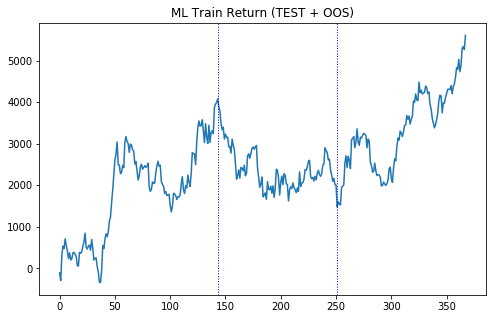

In [39]:
ml_test_oos = pd.concat([backtest_test_data_profit,
                         backtest_oos_data_profit], axis=0).reset_index(drop=True).rename(columns={'profit':'ml_test_oos_profit'})

win = len(ml_test_oos[ml_test_oos['ml_test_oos_profit'] > 0])
lose = len(ml_test_oos[ml_test_oos['ml_test_oos_profit'] < 0])

MDD_end_idx = (np.maximum.accumulate(ml_test_oos['ml_test_oos_profit'].cumsum()) - ml_test_oos['ml_test_oos_profit'].cumsum()).idxmax()
MDD_start_idx = ml_test_oos['ml_test_oos_profit'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = ml_test_oos['ml_test_oos_profit'].cumsum()[:MDD_start_idx + 1].iloc[-1] - ml_test_oos['ml_test_oos_profit'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### TEST + OOS Summary ###########################')
print('1. Total Profit: ', np.sum(ml_test_oos['ml_test_oos_profit']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (ml_test_oos['ml_test_oos_profit'].mean() / ml_test_oos['ml_test_oos_profit'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)

plt.figure(figsize=(8, 5))
plt.title("ML Train Return (TEST + OOS)")
plt.plot(ml_test_oos['ml_test_oos_profit'].cumsum())
plt.axvline(ml_test_oos.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(ml_test_oos.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

In [40]:
pd.concat([ml_test_oos,
           origin_feature_test_oos], axis=1).corr()

,ml_test_oos_profit,origin_feature_test_oos_profit
ml_test_oos_profit,1.000000,0.760931
origin_feature_test_oos_profit,0.760931,1.000000


###  - Quick thoughts 
- What If I use both (original feature & ML model), would it be stablize my portfolio?
    - the corr is pretty high (0.76), but let's mix them and plot the graph.
- 1. Try to re-generate the model with **train+test** data and see the result.
- 2. Bring daily option data and see the result.

### - 1. Try to re-generate the model with train+test data and see the result.

In [41]:
train_test_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

X_train_test = train_test_data.iloc[:, [1,2,3]].astype('category')
y_train_test = train_test_data.iloc[:, 5].astype('category')

os_X_train_test, os_y_train_test = SMOTENC(random_state=0,
                                 categorical_features=[0,2]).fit_sample(X_train_test, y_train_test) 

In [42]:
Updated_Logistic_Regression_model_ovr = LogisticRegression(multi_class='ovr').fit(os_X_train_test, os_y_train_test)

C:\Users\Jay\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
print(classification_report(os_y_train_test, Updated_Logistic_Regression_model_ovr.predict(os_X_train_test)))

              precision    recall  f1-score   support

          -1       0.26      0.24      0.25       221
          -2       0.00      0.00      0.00       221
          -3       0.25      0.65      0.36       221
           1       0.18      0.37      0.25       221
           2       0.50      0.00      0.01       221
           3       0.16      0.07      0.09       221

    accuracy                           0.22      1326
   macro avg       0.23      0.22      0.16      1326
weighted avg       0.23      0.22      0.16      1326



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### - Quick thoughts
- The predicted values have been changed a lot than the previous result.
- The previous model predicted +3 class and -3 class mostly.
- But, now it aimed -3 class and +1 class.
- Have to understand what causes this kind of changes.

In [44]:
pd.Series(Updated_Logistic_Regression_model_ovr.predict(os_X_train_test)).value_counts()

-3    577
1     445
-1    207
3      95
2       2
dtype: int64

### - Train_Test Summary (re-fitted model used)

In [45]:
print(classification_report(y_train_test, Updated_Logistic_Regression_model_ovr.predict(X_train_test)))

              precision    recall  f1-score   support

          -1       0.33      0.25      0.28       195
          -2       0.00      0.00      0.00       125
          -3       0.15      0.57      0.23        89
           1       0.28      0.37      0.32       221
           2       0.50      0.01      0.02       123
           3       0.10      0.07      0.08       102

    accuracy                           0.22       855
   macro avg       0.23      0.21      0.16       855
weighted avg       0.25      0.22      0.18       855



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
updated_pred_y_train_test = pd.Series(Updated_Logistic_Regression_model_ovr.predict(X_train_test))

In [47]:
updated_backtest_train_test_data = pd.concat([train_test_data['date'],
                                              train_test_data['price_diff'],
                                              pd.Series(updated_pred_y_train_test, name='updated_pred_y_train_test'),
                                              pd.Series(y_train_test, name='actual_y_train_test')], axis=1)

In [48]:
updated_backtest_train_test_data_profits = []

for i in range(len(updated_backtest_train_test_data)):
    
    price_diff = updated_backtest_train_test_data.iat[i,1]
    pred_y_train_test = updated_backtest_train_test_data.iat[i,2]
    
    if pred_y_train_test == '3':
        updated_backtest_train_test_data_profits.append(price_diff)
    elif pred_y_train_test == '2':
        updated_backtest_train_test_data_profits.append(price_diff)
    elif pred_y_train_test == '1':
        updated_backtest_train_test_data_profits.append(price_diff)
    elif pred_y_train_test == '-1':
        updated_backtest_train_test_data_profits.append(-price_diff)
    elif pred_y_train_test == '-2':
        updated_backtest_train_test_data_profits.append(-price_diff)
    elif pred_y_train_test == '-3':
        updated_backtest_train_test_data_profits.append(-price_diff)
    else:
        updated_backtest_train_test_data_profits.append(0)

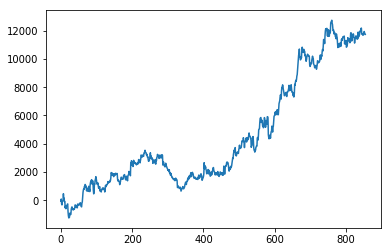

In [49]:
pd.Series(updated_backtest_train_test_data_profits).cumsum().plot()

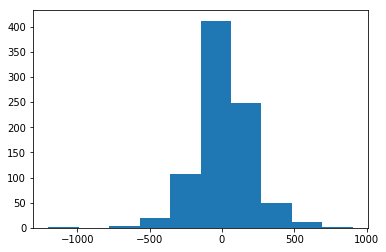

In [50]:
plt.hist(updated_backtest_train_test_data_profits)
plt.show()

In [51]:
updated_backtest_train_data_profit = pd.DataFrame(updated_backtest_train_test_data_profits, columns=['profit'])
print('###########################')
print(len(updated_backtest_train_data_profit[updated_backtest_train_data_profit['profit'] > 300]))
print(len(updated_backtest_train_data_profit[updated_backtest_train_data_profit['profit'] < -300]))
print('###########################')
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] > 200) & (updated_backtest_train_data_profit['profit'] <= 300)]))
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] >= -300) & (updated_backtest_train_data_profit['profit'] < -200)]))
print('###########################')
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] > 100) & (updated_backtest_train_data_profit['profit'] <= 200)]))
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] >= -200) & (updated_backtest_train_data_profit['profit'] < -100)]))
print('###########################')
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] > 0) & (updated_backtest_train_data_profit['profit'] <= 100)]))
print(len(updated_backtest_train_data_profit[(updated_backtest_train_data_profit['profit'] >= -100) & (updated_backtest_train_data_profit['profit'] < -0)]))

###########################
54
41
###########################
56
40
###########################
125
123
###########################
225
191


#### - OOS Summary (re-fitted model used)

In [52]:
print(classification_report(y_oos, Updated_Logistic_Regression_model_ovr.predict(X_oos)))

              precision    recall  f1-score   support

          -1       0.19      0.11      0.14        28
          -2       0.00      0.00      0.00        12
          -3       0.18      0.71      0.29        17
           1       0.24      0.27      0.25        33
           2       0.00      0.00      0.00        19
           3       0.18      0.10      0.12        21

    accuracy                           0.20       130
   macro avg       0.13      0.20      0.13       130
weighted avg       0.15      0.20      0.15       130



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
updated_pred_y_oos = pd.Series(Updated_Logistic_Regression_model_ovr.predict(X_oos))

In [54]:
updated_backtest_oos_data = pd.concat([oos_data['date'],
                               oos_data['price_diff'],
                               pd.Series(updated_pred_y_oos, name='pred_y_oos'),
                               pd.Series(y_oos, name='actual_y_oos')], axis=1)

In [55]:
updated_backtest_oos_data_profits = []

for i in range(len(updated_backtest_oos_data)):
    
    price_diff = updated_backtest_oos_data.iat[i,1]
    pred_y_oos = updated_backtest_oos_data.iat[i,2]
    
    if pred_y_oos == '1':
        updated_backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '2':
        updated_backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '3':
        updated_backtest_oos_data_profits.append(price_diff)
    elif pred_y_oos == '-1':
        updated_backtest_oos_data_profits.append(-price_diff)
    elif pred_y_oos == '-2':
        updated_backtest_oos_data_profits.append(-price_diff)
    elif pred_y_oos == '-3':
        updated_backtest_oos_data_profits.append(-price_diff)
    else:
        updated_backtest_oos_data_profits.append(0)
    

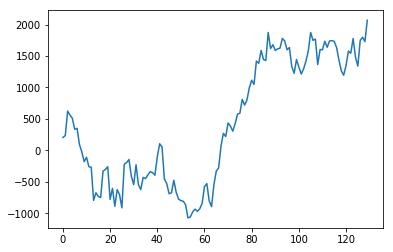

In [56]:
pd.Series(updated_backtest_oos_data_profits).cumsum().plot()

########################### Updated OOS Summary ###########################
1. Total Profit:  2070
2. Happy Rate:  50.7692 %
3. Sharpe Ratio:  1.266
4. MDD Amount : -1700
5. MDD Length : 51


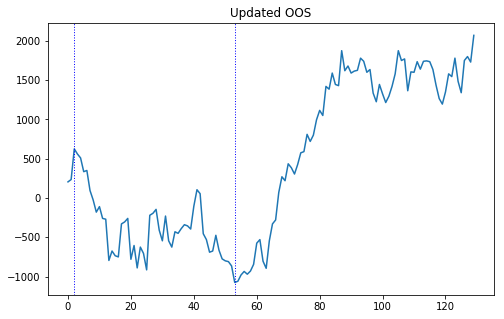

In [57]:
updated_backtest_oos = pd.DataFrame(updated_backtest_oos_data_profits ,columns=['updated_backtest_oos'])

win = len(updated_backtest_oos[updated_backtest_oos['updated_backtest_oos'] > 0])
lose = len(updated_backtest_oos[updated_backtest_oos['updated_backtest_oos'] < 0])

MDD_end_idx = (np.maximum.accumulate(updated_backtest_oos['updated_backtest_oos'].cumsum()) - updated_backtest_oos['updated_backtest_oos'].cumsum()).idxmax()
MDD_start_idx = updated_backtest_oos['updated_backtest_oos'].cumsum()[:MDD_end_idx].idxmax()

MDD_amount = updated_backtest_oos['updated_backtest_oos'].cumsum()[:MDD_start_idx + 1].iloc[-1] - updated_backtest_oos['updated_backtest_oos'].cumsum()[:MDD_end_idx + 1].iloc[-1]

print('########################### Updated OOS Summary ###########################')
print('1. Total Profit: ', np.sum(updated_backtest_oos['updated_backtest_oos']))
print('2. Happy Rate: ', round((win / (win + lose)) * 100, 4), '%')
print('3. Sharpe Ratio: ', round((252**0.5) * (updated_backtest_oos['updated_backtest_oos'].mean() / updated_backtest_oos['updated_backtest_oos'].std()), 4))
print('4. MDD Amount :', -int(MDD_amount))
print('5. MDD Length :', MDD_end_idx - MDD_start_idx)

plt.figure(figsize=(8, 5))
plt.title("Updated OOS")
plt.plot(updated_backtest_oos['updated_backtest_oos'].cumsum())
plt.axvline(updated_backtest_oos.index[MDD_start_idx], color='b', linestyle=':', linewidth=1)
plt.axvline(updated_backtest_oos.index[MDD_end_idx], color='b', linestyle=':', linewidth=1)
plt.show()

In [58]:
pd.concat([pd.Series(oos_origin_feature_profits),
           pd.Series(updated_backtest_oos_data_profits)], axis=1).corr()

,0,1
0,1.000000,0.898201
1,0.898201,1.000000


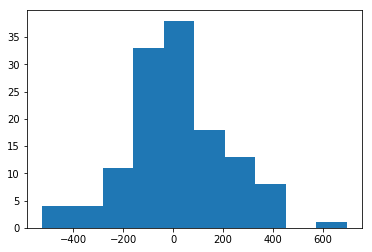

In [59]:
plt.hist(updated_backtest_oos_data_profits)
plt.show()

In [60]:
updated_backtest_oos_data_profit = pd.DataFrame(updated_backtest_oos_data_profits, columns=['profit'])
print('###########################')
print(len(updated_backtest_oos_data_profit[updated_backtest_oos_data_profit['profit'] > 300]))
print(len(updated_backtest_oos_data_profit[updated_backtest_oos_data_profit['profit'] < -300]))
print('###########################')
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] > 200) & (updated_backtest_oos_data_profit['profit'] <= 300)]))
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] >= -300) & (updated_backtest_oos_data_profit['profit'] < -200)]))
print('###########################')
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] > 100) & (updated_backtest_oos_data_profit['profit'] <= 200)]))
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] >= -200) & (updated_backtest_oos_data_profit['profit'] < -100)]))
print('###########################')
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] > 0) & (updated_backtest_oos_data_profit['profit'] <= 100)]))
print(len(updated_backtest_oos_data_profit[(updated_backtest_oos_data_profit['profit'] >= -100) & (updated_backtest_oos_data_profit['profit'] < -0)]))

###########################
10
5
###########################
14
9
###########################
14
17
###########################
28
33


## - Conclusion
- Hard to say that it is better than original feature.
    - Why did I end up with the above result?
        - 1) Lack of data, and the logistic model was not able to figure out a better pattern.
            - I felt a need of synthetic data.
        - 2) The target values are all binary format. I shouldn't convert data from numeric to binary. What I have done was compressing information.
            - Let's try with Numerical data (do not convert to categorical data)
        - 3) The input values are all binary format also. Same page here. I will work on the original input data instead of binary data. 
            - Let's try with Numerical data (do not convert to categorical data)
        - 4) The model tunning was not conducted 
            - Let's try to elaborate the model.
- Had a fun with this, and learned more about the logistic regression from this project.